In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Apr 12 11:45:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [5]:
pwd

'/content'

In [6]:
cd drive

/content/drive


In [7]:
cd MyDrive/

/content/drive/MyDrive


In [8]:
cd Computerized_clinical_coding/

/content/drive/MyDrive/Computerized_clinical_coding


In [9]:
cd data

/content/drive/MyDrive/Computerized_clinical_coding/data


In [10]:
# !pip install accelerate>=0.21.0
# !pip install transformers[torch]
!pip install accelerate
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 2.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [11]:
import pandas as pd
file_path = '/content/drive/MyDrive/Computerized_clinical_coding/'
data_path = '/content/drive/MyDrive/Computerized_clinical_coding/data/'

In [12]:
#df_procedures = pd.read_csv(data_path+'D_ICD_PROCEDURES.csv')
df = pd.read_csv(data_path+'NOTEEVENTS_NEW.csv')

In [13]:
df.head(5)

,Unnamed: 0,ROW_ID,SUBJECT_ID,HADM_ID,TEXT
0,100164,107417,88360,130127,Sinus rhythm with A-V conduction delay. Infer...
1,100165,107418,88360,130127,Sinus rhythm with A-V conduction delay. Infero...
2,100166,107419,14209,117857,Sinus rhythm. Normal ECG. Compared to the prev...
3,100167,107420,14209,117857,Sinus tachycardia. Low limb lead voltage. Comp...
4,100168,107421,10959,135569,Sinus bradycardia\nPremature beats - may be ju...


In [14]:
df['TEXT'][0]

'Sinus rhythm with A-V conduction delay.  Inferior myocardial infarction with\nST-T wave configuration consistent with acute process.  Right-sided chest\nleads show one to two millimeters of ST segment elevation in leads V3R and V4R.\nSince the previous tracing of the same date right-sided chest leads are taken.\nTRACING #2\n\n'

In [15]:
df['HADM_ID'][0]

130127

In [16]:
df2 = pd.read_csv('DIAGNOSES_ICD.csv')

In [17]:
df2.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


In [18]:
df2.shape

(651047, 5)

## Data Exploration

In [19]:
# Let us look at the data in detail
# Let us take Diagnoses data first

df.shape

(429238, 5)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429238 entries, 0 to 429237
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  429238 non-null  int64 
 1   ROW_ID      429238 non-null  int64 
 2   SUBJECT_ID  429238 non-null  int64 
 3   HADM_ID     429238 non-null  int64 
 4   TEXT        429238 non-null  object
dtypes: int64(4), object(1)
memory usage: 16.4+ MB


In [21]:
df.duplicated().sum()

0

<Axes: ylabel='Frequency'>

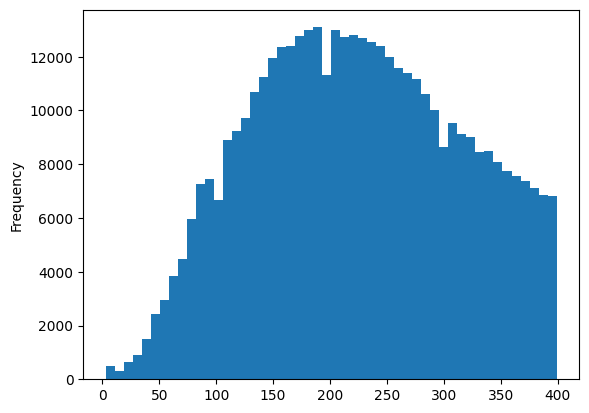

In [22]:
## Check the character length distribution for the LONG_TITLE column
df['TEXT'].str.len().plot.hist(bins=50)

In [23]:
df2['ICD9_CODE'].value_counts()

ICD9_CODE
4019     20703
4280     13111
42731    12891
41401    12429
5849      9119
         ...  
34691        1
2326         1
43814        1
71840        1
83301        1
Name: count, Length: 6984, dtype: int64

## Merge two datasets based on HADM_ID

In [24]:
# Merge the two dataframes on 'HADM_ID'
merged_df = pd.merge(df, df2, on='HADM_ID', how='left')

# Group by 'HADM_ID' and aggregate 'ICD9_CODE' values
icd_codes_df = merged_df.groupby('HADM_ID')['ICD9_CODE'].apply(lambda x: ','.join(x.dropna().astype(str))).reset_index()

# Merge the aggregated ICD9_CODE values back to the original dataframe
df_big = pd.merge(df, icd_codes_df, on='HADM_ID', how='left')

# Rename the aggregated column
df_big.rename(columns={'ICD9_CODE': 'icd_codes'}, inplace=True)



In [25]:
print(df_big)

        Unnamed: 0   ROW_ID  SUBJECT_ID  HADM_ID  \
0           100164   107417       88360   130127   
1           100165   107418       88360   130127   
2           100166   107419       14209   117857   
3           100167   107420       14209   117857   
4           100168   107421       10959   135569   
...            ...      ...         ...      ...   
429233     2083153  2075611       31668   134163   
429234     2083163  2079743       32242   163974   
429235     2083165  2079745       32242   163974   
429236     2083168  2075880       31668   134163   
429237     2083179  2070661       31097   115637   

                                                     TEXT  \
0       Sinus rhythm with A-V conduction delay.  Infer...   
1       Sinus rhythm with A-V conduction delay. Infero...   
2       Sinus rhythm. Normal ECG. Compared to the prev...   
3       Sinus tachycardia. Low limb lead voltage. Comp...   
4       Sinus bradycardia\nPremature beats - may be ju...   
...      

In [26]:
df_big.shape

(429238, 6)

In [27]:
df = df_big.sample(n=50000, random_state=42)

In [28]:
df.shape

(50000, 6)

In [29]:
df.head()

,Unnamed: 0,ROW_ID,SUBJECT_ID,HADM_ID,TEXT,icd_codes
69626,214650,227537,29124,175333,Sinus rhythm. Frequent atrial premature beats...,"5770,5570,5772,42731,51881,1890,4280,5734,2895..."
324821,1785537,1792830,8003,121265,"Newborn Med Attending\n\nCont on CPAP6, RA. No...","V3401,769,7742,76516,7615,V290,V053,V721,V3401..."
358293,1876817,1896476,15451,140900,"Neonatology Attending\n\nNow day of life 10, C...","V3001,769,76519,76528,V290,V053,V3001,769,7651..."
299835,1715625,1710615,2384,167461,"Neonatology Attending\nExam AF small, soft, fl...","V3101,76518,76528,7793,7706,77081,77981,V502,V..."
355525,1869196,1879569,14292,199792,Agree w/ above note by [**Initials (NamePatter...,"V3001,76517,7742,76526,77081,77089,V290,V502,V..."


In [30]:
df = df[['HADM_ID', 'TEXT', 'icd_codes']]

In [31]:
df.head()

,HADM_ID,TEXT,icd_codes
69626,175333,Sinus rhythm. Frequent atrial premature beats...,"5770,5570,5772,42731,51881,1890,4280,5734,2895..."
324821,121265,"Newborn Med Attending\n\nCont on CPAP6, RA. No...","V3401,769,7742,76516,7615,V290,V053,V721,V3401..."
358293,140900,"Neonatology Attending\n\nNow day of life 10, C...","V3001,769,76519,76528,V290,V053,V3001,769,7651..."
299835,167461,"Neonatology Attending\nExam AF small, soft, fl...","V3101,76518,76528,7793,7706,77081,77981,V502,V..."
355525,199792,Agree w/ above note by [**Initials (NamePatter...,"V3001,76517,7742,76526,77081,77089,V290,V502,V..."


In [32]:
# Remove rows where 'icd_codes' column value is null
df = df.dropna(subset=['icd_codes'])

# Remove rows where 'icd_codes' column value is unrealistically large
df = df[~df['icd_codes'].str.contains('E+')]

In [33]:
df.head()

,HADM_ID,TEXT,icd_codes
69626,175333,Sinus rhythm. Frequent atrial premature beats...,"5770,5570,5772,42731,51881,1890,4280,5734,2895..."
324821,121265,"Newborn Med Attending\n\nCont on CPAP6, RA. No...","V3401,769,7742,76516,7615,V290,V053,V721,V3401..."
358293,140900,"Neonatology Attending\n\nNow day of life 10, C...","V3001,769,76519,76528,V290,V053,V3001,769,7651..."
299835,167461,"Neonatology Attending\nExam AF small, soft, fl...","V3101,76518,76528,7793,7706,77081,77981,V502,V..."
355525,199792,Agree w/ above note by [**Initials (NamePatter...,"V3001,76517,7742,76526,77081,77089,V290,V502,V..."


In [34]:
#df.to_csv('updated_df.csv')

<Axes: ylabel='Frequency'>

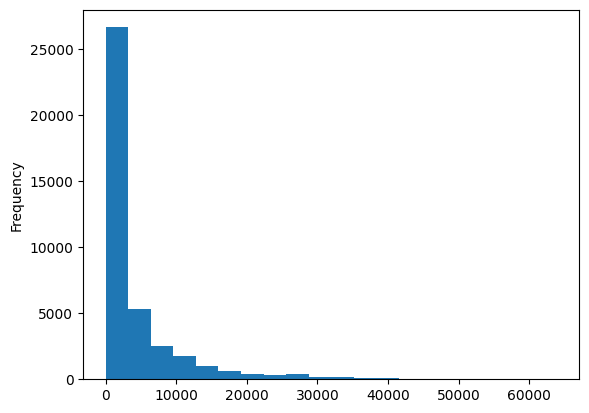

In [35]:
## Check the character length distribution for the LONG_TITLE column
df['icd_codes'].str.len().plot.hist(bins=20)

In [36]:
# Filter rows based on the length of the 'icd_codes' column string
df = df[df['icd_codes'].str.len().between(8000, 30000)]

In [37]:
df.head()

,HADM_ID,TEXT,icd_codes
350772,160882,Neonatal NP-Exam\n\nSee Dr.[**Doctor Last Name...,"V3001,76504,769,77213,7707,7742,77181,7793,482..."
403578,152758,NPN 7A7P ADD\n[** **] IN AT 1430 TO DC [**Know...,"V3401,76503,7793,769,4160,7742,7702,77212,7652..."
265007,111806,Resp Care Note:\n\nPt cont [** **] and on mech...,"72886,0389,99592,51881,78552,325,3229,37601,51..."
300986,199039,Respiratory care Note\nPt. continues on 5cmH2O...,"V3000,76503,7742,769,1123,76523,77082,7766,771..."
397279,186897,NP NOTE\nPE:growing preterm infantnestled in o...,"V3101,76514,769,42840,7742,7793,77181,77989,46..."


In [38]:
df.shape

(5572, 3)

In [39]:
df['icd_codes'] = df['icd_codes'].str.split(',')
icd_counts = [i for icd in df['icd_codes'] for i in icd]
pd.Series(icd_counts).value_counts()

7742     956850
769      943555
7766     563429
7707     544541
7470     543105
          ...  
70706       275
7876        275
78820       275
7821        275
V4502       275
Name: count, Length: 685, dtype: int64

In [40]:
icd_counts_series = pd.Series(icd_counts)
# Getting the 50 most popular icd_codes
top_50_icd_codes = icd_counts_series.value_counts().head(50).index.tolist()

# Creating DataFrame with 50 most popular icd_codes
top_50_df = df[df['icd_codes'].apply(lambda x: any(icd in x for icd in top_50_icd_codes))]

top_50_df.head()

,HADM_ID,TEXT,icd_codes
350772,160882,Neonatal NP-Exam\n\nSee Dr.[**Doctor Last Name...,"[V3001, 76504, 769, 77213, 7707, 7742, 77181, ..."
403578,152758,NPN 7A7P ADD\n[** **] IN AT 1430 TO DC [**Know...,"[V3401, 76503, 7793, 769, 4160, 7742, 7702, 77..."
300986,199039,Respiratory care Note\nPt. continues on 5cmH2O...,"[V3000, 76503, 7742, 769, 1123, 76523, 77082, ..."
397279,186897,NP NOTE\nPE:growing preterm infantnestled in o...,"[V3101, 76514, 769, 42840, 7742, 7793, 77181, ..."
380605,133776,[** 18**] Physical exam\nAwake and alert. Nasa...,"[V3001, 769, 7742, 76515, 76525, 36221, V290, ..."


In [41]:
top_50_df.shape

(5069, 3)

In [52]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from transformers import DistilBertTokenizer, DistilBertModel, DistilBertConfig
from sklearn.preprocessing import MultiLabelBinarizer
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import hamming_loss, accuracy_score, f1_score, precision_score, recall_score

In [53]:
# Load pre-trained DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
config = DistilBertConfig.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

In [54]:
# MultiLabelBinarizer for one-hot encoding of labels
mlb = MultiLabelBinarizer()
icd_labels = mlb.fit_transform(top_50_df['icd_codes'])
num_labels = len(mlb.classes_)

In [55]:
# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.FloatTensor(label)
        }

In [56]:
# Define model architecture
class DistilBERTClassifier(nn.Module):
    def __init__(self, model, num_labels):
        super(DistilBERTClassifier, self).__init__()
        self.model = model
        self.hidden_size = self.model.config.dim
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state[:, 0, :]
        output = self.dropout(last_hidden_state)
        output = self.fc(output)
        return torch.sigmoid(output)

In [57]:
# Instantiate the dataset and dataloader
MAX_LEN = 128
BATCH_SIZE = 8

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dataset = CustomDataset(
    texts=top_50_df['TEXT'].values,
    labels=icd_labels,
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

In [58]:
# Instantiate the model, optimizer, and loss function
model = DistilBERTClassifier(model, num_labels)
model.to(device)
#optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
criterion = nn.BCELoss()

In [49]:
# Training loop
EPOCHS = 20

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for batch in dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    print(f'Epoch {epoch + 1}/{EPOCHS}, Loss: {avg_loss:.4f}')

# Save the model
torch.save(model.state_dict(), 'distilbert_multilabel_classification.pth')

Epoch 1/20, Loss: 0.1334
Epoch 2/20, Loss: 0.0833
Epoch 3/20, Loss: 0.0802
Epoch 4/20, Loss: 0.0774
Epoch 5/20, Loss: 0.0745
Epoch 6/20, Loss: 0.0716
Epoch 7/20, Loss: 0.0681
Epoch 8/20, Loss: 0.0638
Epoch 9/20, Loss: 0.0586
Epoch 10/20, Loss: 0.0527
Epoch 11/20, Loss: 0.0461
Epoch 12/20, Loss: 0.0395
Epoch 13/20, Loss: 0.0333
Epoch 14/20, Loss: 0.0276
Epoch 15/20, Loss: 0.0227
Epoch 16/20, Loss: 0.0190
Epoch 17/20, Loss: 0.0152
Epoch 18/20, Loss: 0.0124
Epoch 19/20, Loss: 0.0106
Epoch 20/20, Loss: 0.0086


In [59]:
# Evaluation function
def evaluate_model(model, dataloader, device):
    model.eval()
    true_labels = []
    pred_labels = []
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask)
            predicted = (outputs > 0.5).float()  # Thresholding at 0.5 for binary classification

            true_labels.extend(labels.cpu().numpy())
            pred_labels.extend(predicted.cpu().numpy())

    true_labels = np.array(true_labels)
    pred_labels = np.array(pred_labels)

    # Hamming Loss
    hamming_loss_val = hamming_loss(true_labels, pred_labels)

    # Exact Match Ratio
    exact_match_ratio = accuracy_score(true_labels, pred_labels)

    # F1 Score
    f1 = f1_score(true_labels, pred_labels, average='samples')

    # Precision
    precision = precision_score(true_labels, pred_labels, average='samples')

    # Recall
    recall = recall_score(true_labels, pred_labels, average='samples')

    return {
        'Hamming Loss': hamming_loss_val,
        'Exact Match Ratio': exact_match_ratio,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    }

In [60]:
# Load the trained model
model = DistilBERTClassifier(model, num_labels)
model.load_state_dict(torch.load('distilbert_multilabel_classification.pth'))
model.to(device)

# Evaluate the model
evaluation_result = evaluate_model(model, dataloader, device)
print("Evaluation Metrics:")
for metric, value in evaluation_result.items():
    print(f"{metric}: {value:.4f}")

AttributeError: 'DistilBERTClassifier' object has no attribute 'config'

In [61]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Evaluation function with probability outputs
def evaluate_model_with_probs(model, dataloader, device):
    model.eval()
    true_labels = []
    pred_probs = []
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask)
            pred_probs.extend(outputs.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    true_labels = np.array(true_labels)
    pred_probs = np.array(pred_probs)

    return true_labels, pred_probs

# Get true labels and predicted probabilities
true_labels, pred_probs = evaluate_model_with_probs(model, dataloader, device)

# Compute ROC curve and ROC AUC for each label
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_labels):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(num_labels):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for class {mlb.classes_[i]}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

Output hidden; open in https://colab.research.google.com to view.